<div class="alert alert-block alert-info"><h1 style="text-align:center;color:black"> Bank Note Authentication Using Neural Network 🚀 </h1> </div> 

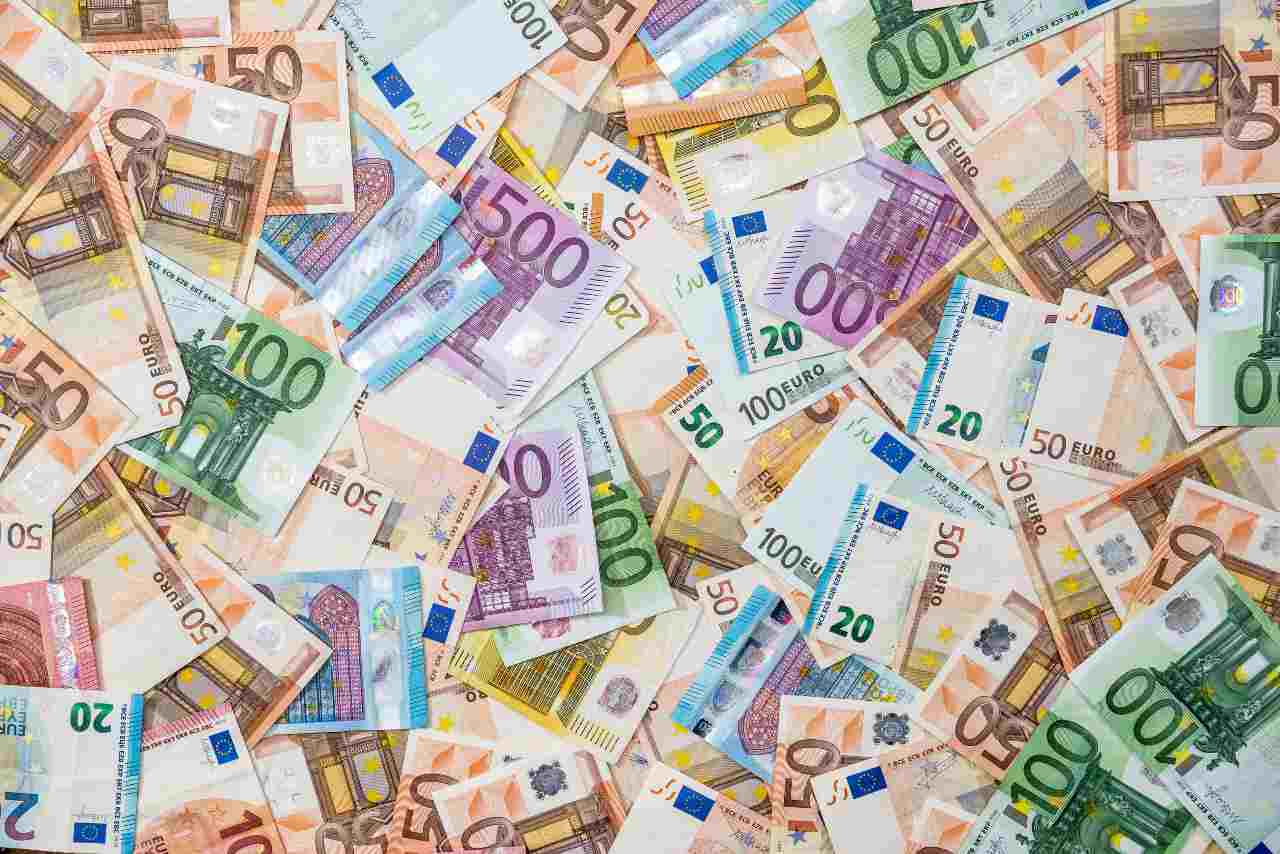

<div class="alert alert-block alert-warning"><h2 style="text-align:Center;color:black">Table of Content </h2> </div>

1. [Introduction 💥](#1)
1. [Data Description](#2)
1. [Loading Libraries📖](#3)
1. [Get the data📁](#4)
1. [Data Exploration📊](#5)
1. [Data Preparation 🛠️](#6)
    1. [Standard Scaling](#7)
1. [Train Test Split⚙️](#8)
1. [Deep learning Model](#9)
1. [Model Evaluvation](#10)
1. [Thank You](#11)

<a id='1'></a>
<div class="alert alert-block alert-danger"><h2 style="text-align:center;color:black"> Introduction 💥</h2> </div> 

* In this notebook we are going to classfication of notes as original(1) or Duplicate(0) on the basis of different feature(Variance, Skewness, Curtosis, Entropy). 
> We will be using pandas, matplotlib, seaborn, tensorflow, scikit-learn .
* First we will clean our data(remove outliers) then we will train our models, predict the class and then check accuracy of our models.

> Our goal is to create an accurate deep learning model that can classify the bank note using the given data.

>  **The score of the deep learning model is 1.0🔥** 

<a id='2'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Description </h2> </div> 

In [ ]:
The data consists of 5 columns:

* variance: variance of Wavelet Transformed image (continuous)
* skewness: skewness of Wavelet Transformed image (continuous)
* curtosis: curtosis of Wavelet Transformed image (continuous)
* entropy: entropy of image (continuous)
* class: class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning

<a id='3'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Loading Libraries </h2> </div> 

In [2]:
# Basic
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

#Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers

# Warnings
import warnings
warnings.filterwarnings('ignore')

<a id='4'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Get the data </h2> </div>

In [3]:
# pandas to read in the bank_note_data.csv file
data = pd.read_csv('./data_banknote_authentication.csv')

In [4]:
#  Check the head of the Data
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
# infromation about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
# data description
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


> <div class="alert alert-block alert-danger"><h7 style="text-align:center;color:black"> 💡 There are no missing values neither in the competition nor the original dataset. Also, by a quick eye-ball comparison of the summary statistics of the dataset, data seem to have similar distributions. </h7> </div>

<a id='5'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Exploration </h2> </div>

First, we start by visualizing the variable of interest.
We will create the counplot for class column.

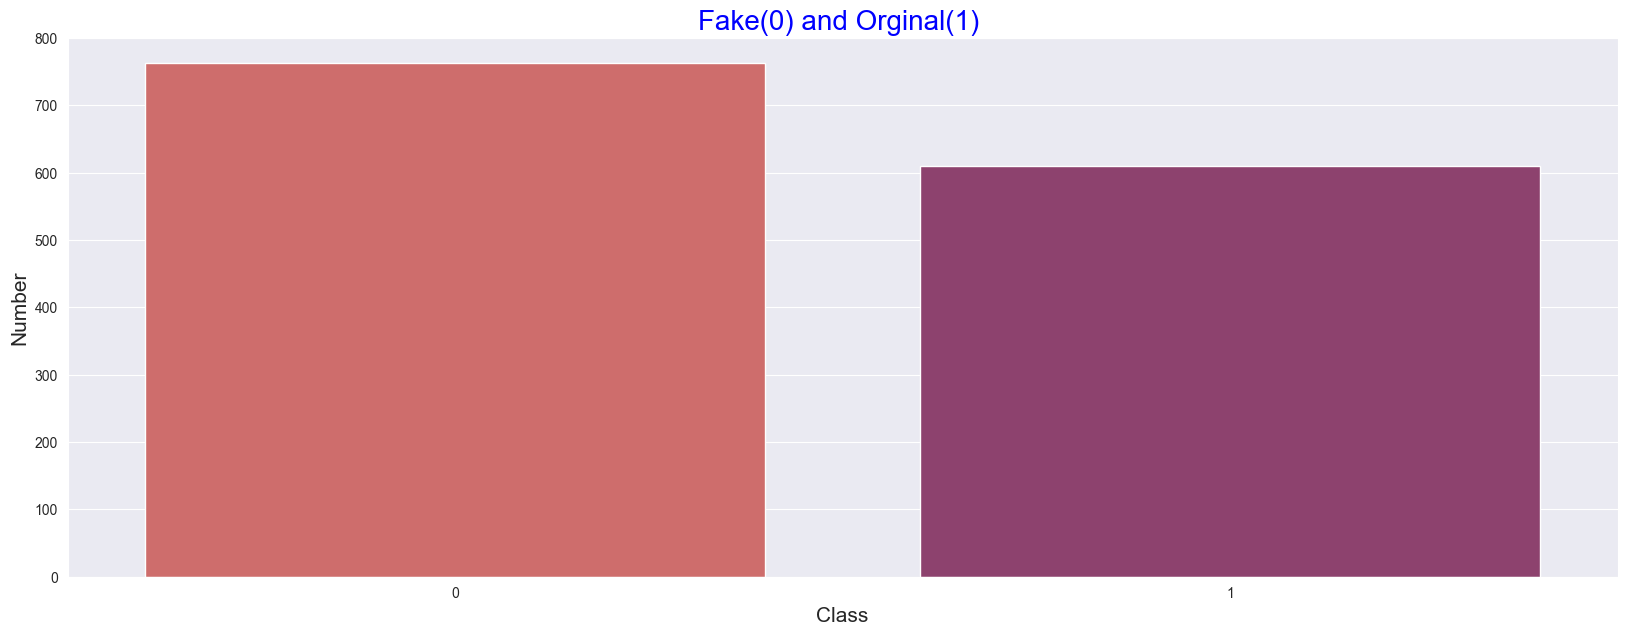

In [7]:
# Count plot for label class
plt.figure(figsize=(20,7))
sns.set_style('darkgrid')

sns.countplot(data=data,x='class',palette='flare')
plt.title('Fake(0) and Orginal(1) ',fontdict={'size':20,'color':'blue'})
plt.xlabel('Class',fontsize=15)
plt.ylabel('Number',fontsize=15)
plt.show()

Now we will Create a PairPlot of the Data with Seaborn, set Hue to Class.

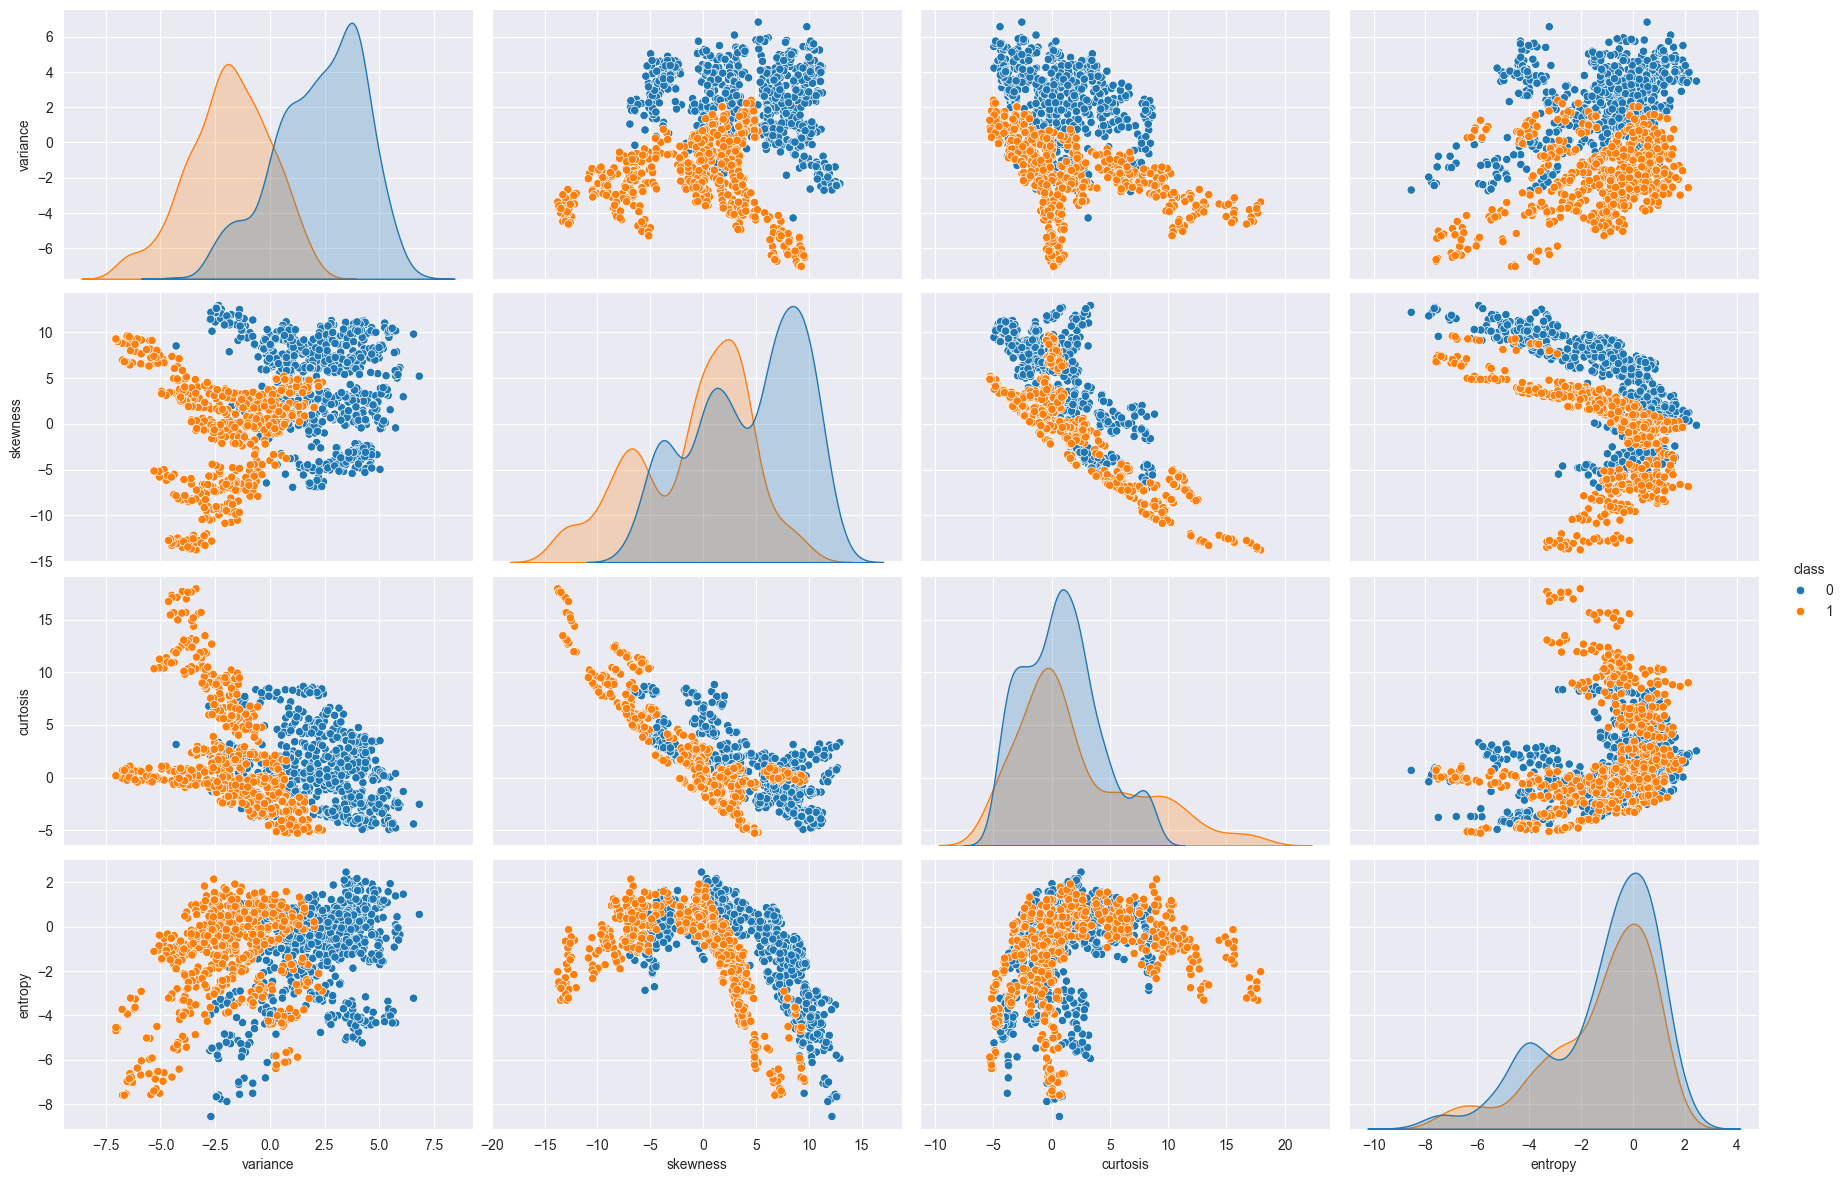

In [8]:
# pairplot for the data
sns.pairplot(data=data,hue='class',height=3,aspect=1.5)
plt.show()

Heatmap for corrleation of features

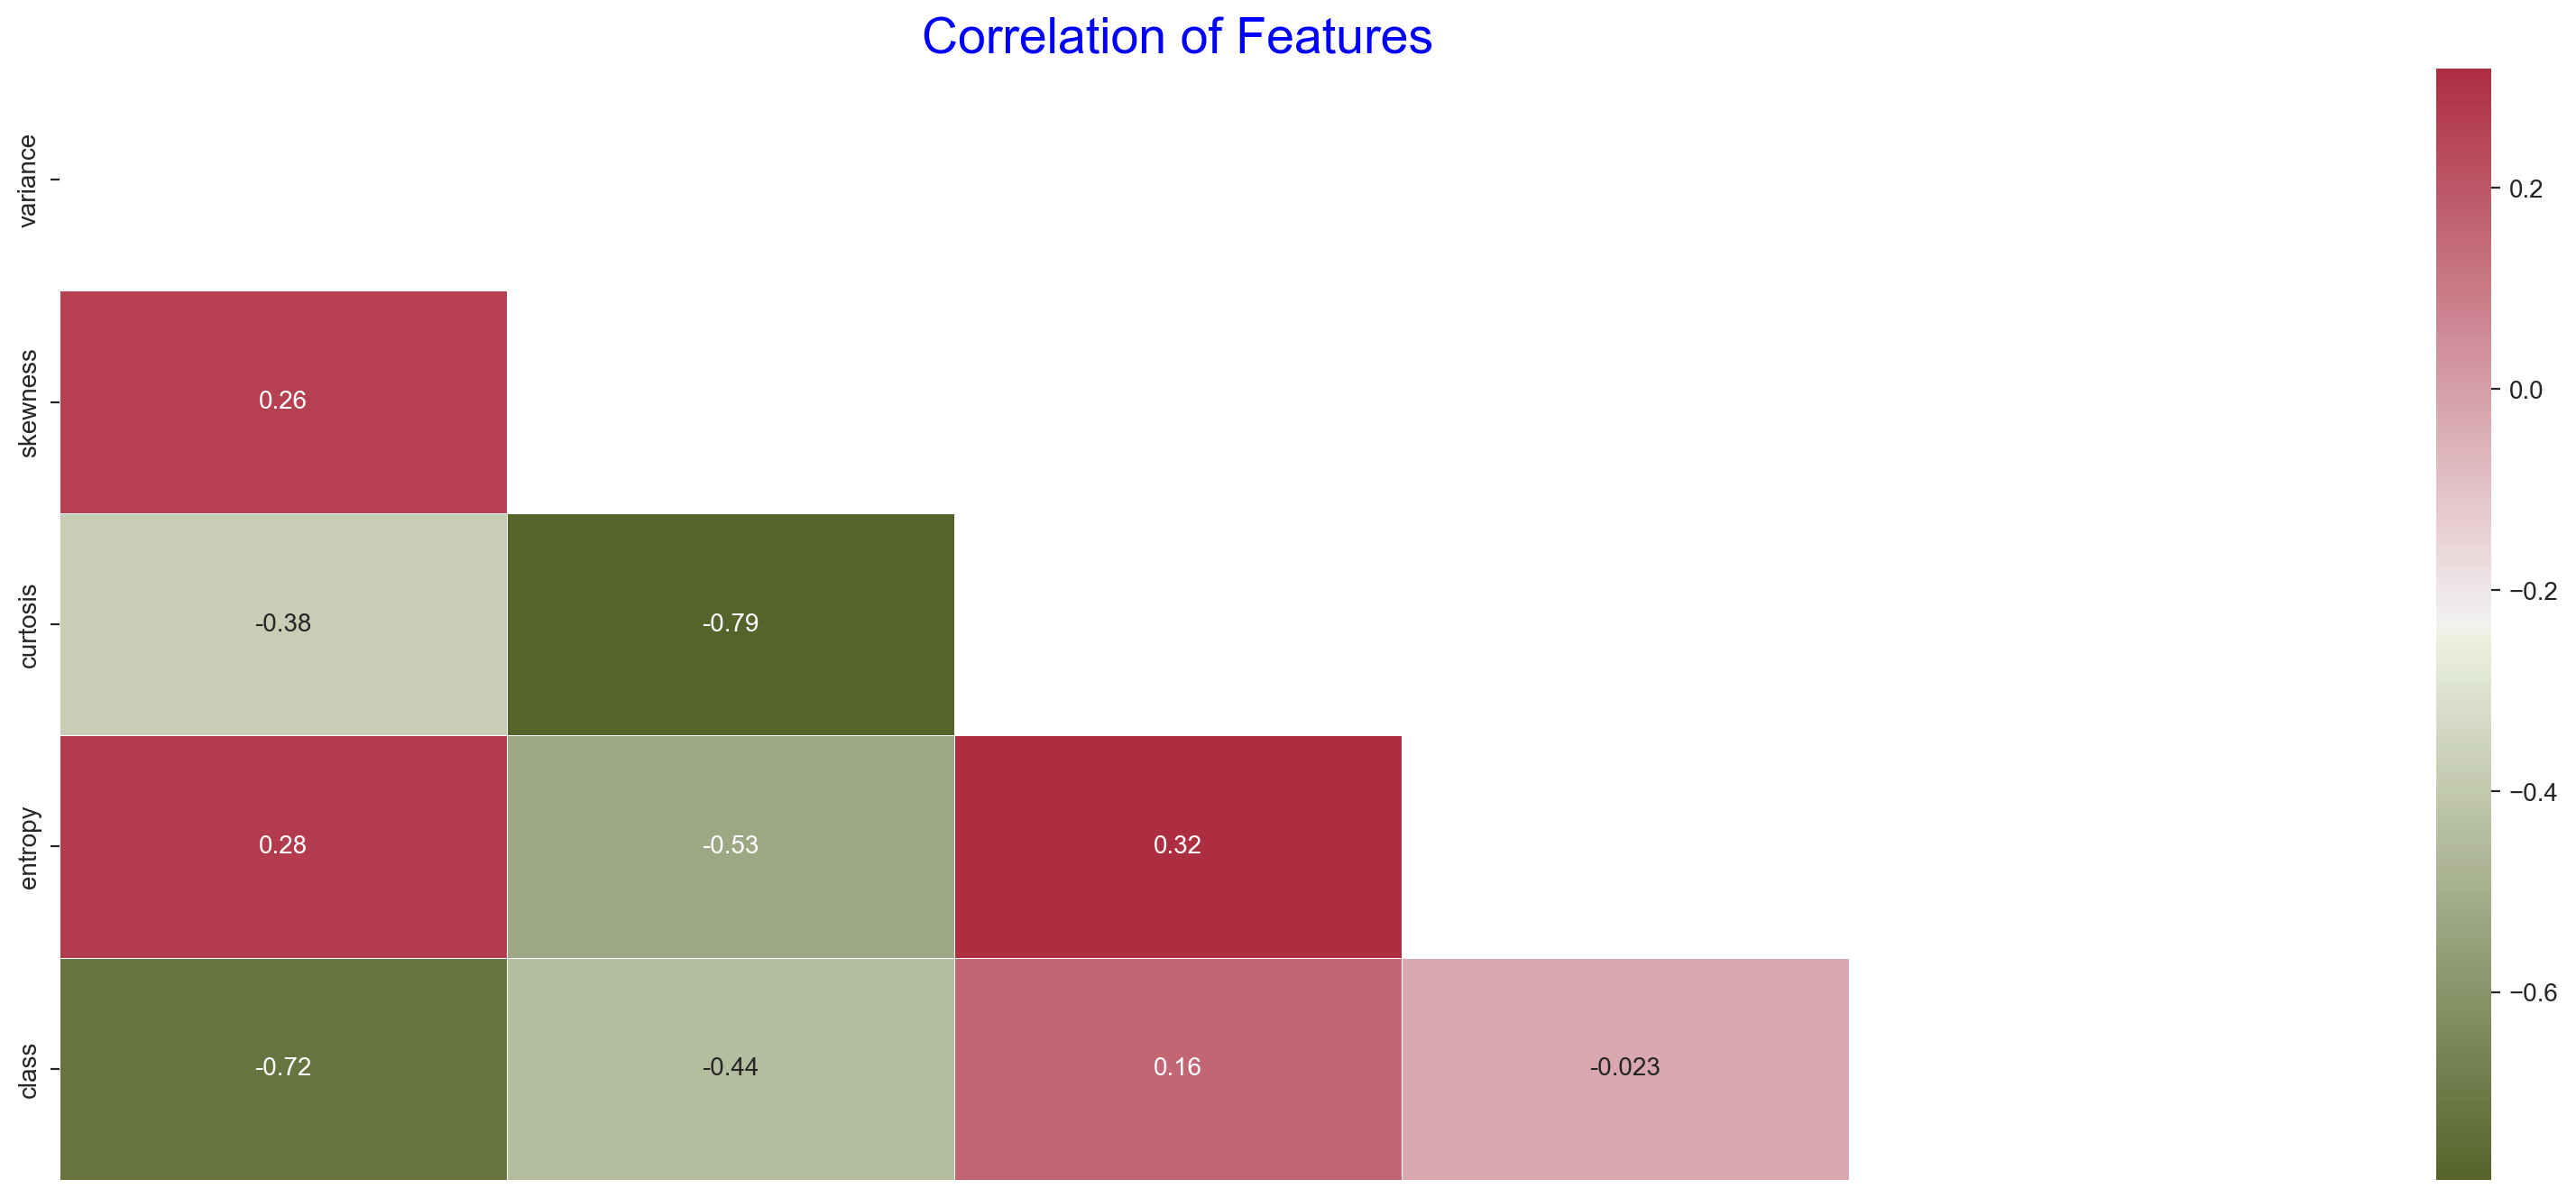

In [9]:
# heatmap to show the correlation of variables 
plt.figure(figsize=(20,8),dpi=200)
sns.set_style('ticks')
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)

corr = data.corr(numeric_only=True)
matrix = np.triu(corr)    # to mask the upper triangle
 
sns.heatmap(corr,mask=matrix,cmap=cmap,annot=True,linewidths=0.2,xticklabels=False)
plt.title('Correlation of Features',fontdict={'size':20,'color':'blue'})

plt.show()

<a id='6'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Preparation </h2> </div>

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data

<a id ='7'></a>
<div class="alert alert-block alert-warning"><h3 style="text-align:Center;color:black"> Standard Scaling </h3> </div>

In [10]:
X = data.drop(columns='class')

# StandardScaler() object called scaler
scaler = StandardScaler()

#Fit scaler to the features.
scaler.fit(X)  

# to transform the features to a scaled version
scaled_feature = scaler.fit_transform(X)

# scaled features to a dataframe 
df = pd.DataFrame(scaled_feature,columns=X.columns)
df.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


<a id='8'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Train Test Split </h2> </div>

In [11]:
# X and y which are the scaled feature
X = df.values
y = data['class'].values

In [12]:
# create training and testing sets of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<a id='9'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Deep Learning Model </h2> </div>

In [13]:
model = keras.Sequential()

#input layers 
model.add(layers.Dense(units =8 ,activation='relu',input_dim =4))

#hidden layers
model.add(layers.Dense(units=8,activation='relu'))
model.add(layers.Dense(units=8,activation='relu'))

# output layers
model.add(layers.Dense(units=1,activation='sigmoid'))

In [14]:
# model loss and metrics
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# to stop overfiting of the data
early_stoping = keras.callbacks.EarlyStopping(patience=20,
                                              min_delta=0.001,
                                              restore_best_weights=True,
                                             )

In [15]:
# fiting the model to train data
note = model.fit(X_train,y_train,
                  batch_size=24,
                  epochs=100,
                  validation_split=0.25,
                  callbacks=[early_stoping],
                  verbose=0)

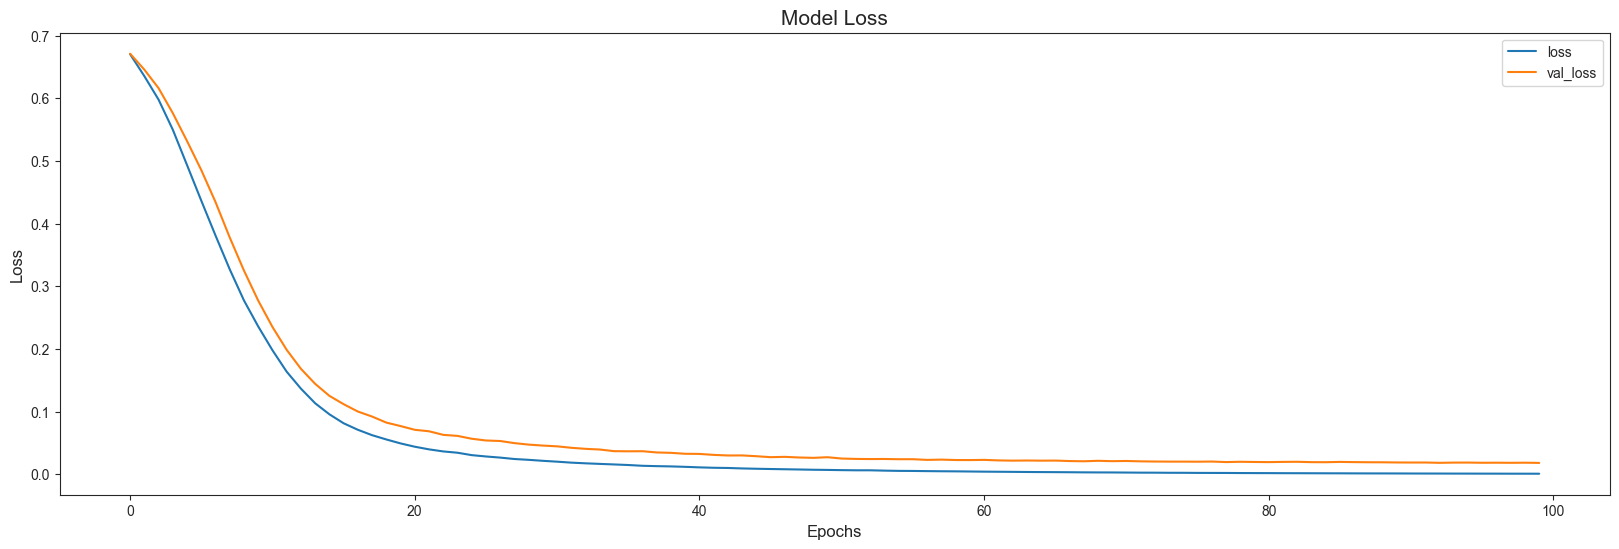

In [16]:
# plots for loss and accuracy of train data

loss = pd.DataFrame(note.history)

# loss for model with epochs
loss.loc[:,['loss','val_loss']].plot(figsize=(20,6))
plt.title('Model Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.show()

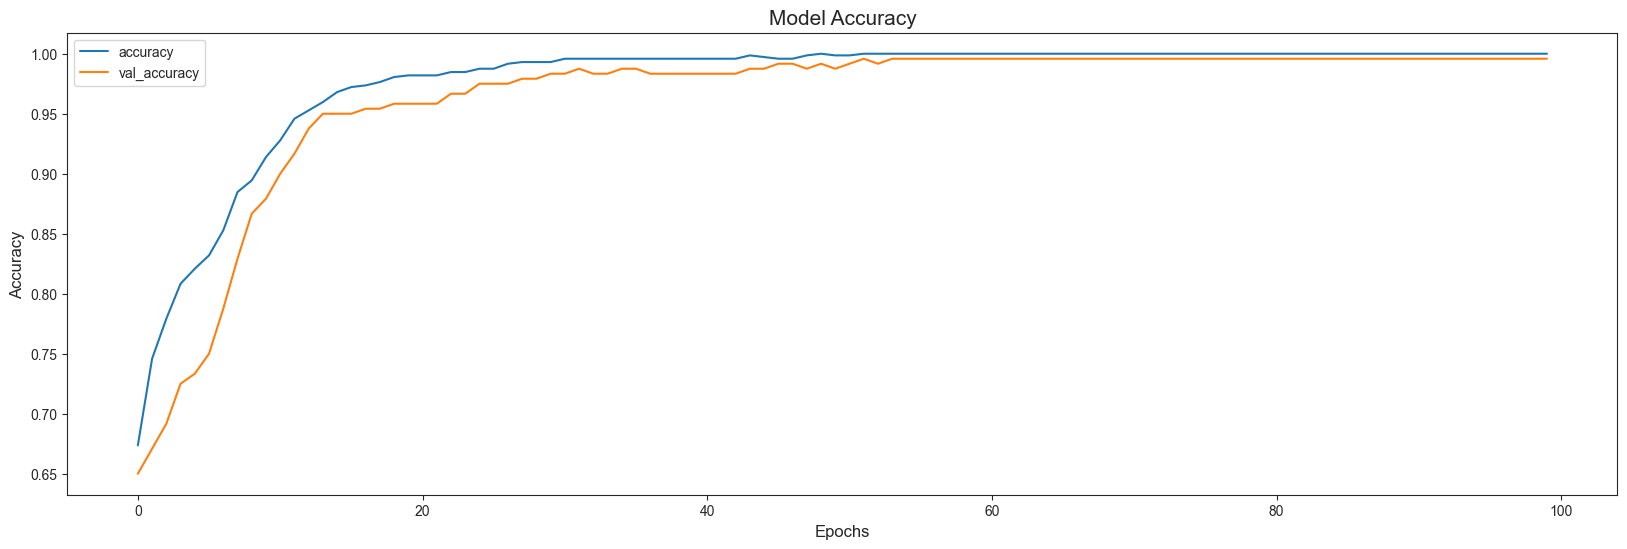

In [17]:
# Accuracy plot for model
loss.loc[:,['accuracy','val_accuracy']].plot(figsize=(20,6))
plt.title('Model Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show()

<a id='10'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Model Evaluation
 </h2> </div>

In [18]:
# create predictions from X_test
pred = model.predict(X_test)

# pred if >0.5 =1 else 0
pred = np.where(pred>0.5,1,0) 

13/13 [==============================] - 0s 1ms/step


In [19]:
print('Before flatten shape:',pred.shape)
pred = pred.flatten()
print('After Flatten shape of pred',pred.shape)

Before flatten shape: (412, 1)
After Flatten shape of pred (412,)


In [20]:
# classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test,pred)
print(cm)

[[238   0]
 [  0 174]]


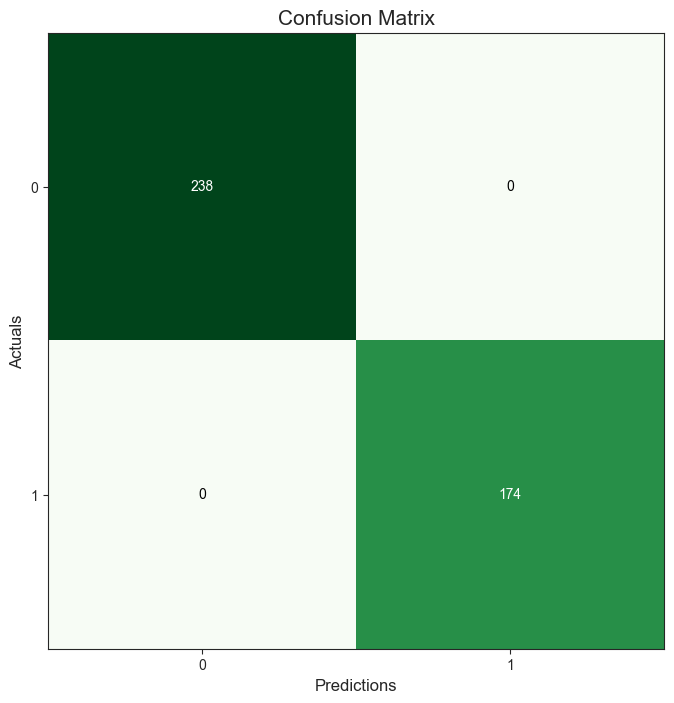

In [22]:
## plot a confusion matrix8
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(8, 8), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

#### The Prediction Score of this Deep learning model is 100 %.

> <div class="alert alert-block alert-danger"><h4 style="color:black"> I hope you enjoyed this notebook and learned something new. 😊 If you did, please consider upvoting it and leaving a comment. I would love to hear your feedback and suggestions. 💬 </h4> </div>
<div class="alert alert-block alert-info"><h2 style="color:black;text-align:center">Thank You </h2></div>
<a id='11'></a>